## BRENO NAKAD MARCOLINO SALA 2A

Esse projeto tem como objetivo analisar a situação dos aposentados com base na pnad de 2014. Os aspectos analisados de modo a
gerar conclusões plausíveis são: sexo, idade, aposentadoria, raça, analfabetismo e a combinação entre elas.

In [70]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [71]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Breno\Downloads


In [72]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""

estrutura = pd.read_table("pes_py.txt", sep=";")

In [76]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [74]:
dados = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

In [77]:
dados.head()

,0,1,2,3,4,5,6,7,8,9,...,331,332,333,334,335,336,337,338,339,340
0,2014,11,15,1,1,2,19,8,1987,27,...,3,500,3,3,1,2,2,1,500,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3,500,3,4,2,NaN,2,1,500,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3,500,3,1,NaN,NaN,NaN,NaN,500,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2,1150,4,2,1,2,2,1,1150,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2,1150,4,3,1,2,2,1,1150,20160623


In [78]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [79]:
dados.columns = estrutura.Coluna

In [80]:
dados.head()

Coluna,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2014,11,15,1,1,2,19,8,1987,27,...,3,500,3,3,1,2,2,1,500,20160623
1,2014,11,15,1,2,4,19,1,1986,28,...,3,500,3,4,2,NaN,2,1,500,20160623
2,2014,11,15,1,3,2,14,5,2013,1,...,3,500,3,1,NaN,NaN,NaN,NaN,500,20160623
3,2014,11,15,2,1,2,8,4,1963,51,...,2,1150,4,2,1,2,2,1,1150,20160623
4,2014,11,15,2,2,4,6,11,1970,43,...,2,1150,4,3,1,2,2,1,1150,20160623


In [81]:
dados.Aposentados = dados[dados.V9122 == 2].V0302.astype('category')
dados.Aposentados.cat.categories = ('Homem', 'Mulher')
dados.Aposentados.value_counts(True)*100

Mulher    50.793158
Homem     49.206842
dtype: float64

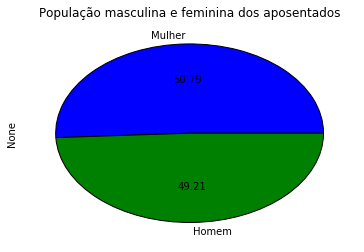

In [118]:
divisao_aposentados= dados.Aposentados.value_counts(True)*100
divisao_aposentados.plot(kind='pie',autopct="%0.2f",legend=False,title='População masculina e feminina dos aposentados')

Agora, vamos fazer os aposentados do sexo masculino por estado. Para isso, é preciso fazer uma combinação dos estados com os dados
dos aposentados!

In [84]:
estados = dados[(dados.V9122 ==2) & (dados.V0302 == 2)].UF.astype("category")

In [85]:

estados.cat.categories = ("Rondônia","Acre","Amazonas","Roraima","Pará","Amapá","Tocantins","Maranhão","Piauí","Ceará","Rio Grande do Norte","Paraíba","Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro","São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goiás","Distrito Federal")
estados.value_counts()

São Paulo              2524
Minas Gerais           2101
Rio Grande do Sul      2079
Rio de Janeiro         1662
Bahia                  1227
Paraná                 1121
Pernambuco             1047
Ceará                   882
Pará                    762
Santa Catarina          729
Goiás                   688
Maranhão                397
Espírito Santo          364
Distrito Federal        359
Amazonas                321
Mato Grosso             319
Paraíba                 312
Sergipe                 297
Piauí                   294
Tocantins               281
Mato Grosso do Sul      266
Rondônia                264
Alagoas                 242
Rio Grande do Norte     216
Acre                    119
Amapá                    75
Roraima                  67
dtype: int64

Agora com a divisão pronta, vamos analisar os homens aposentados por estado!

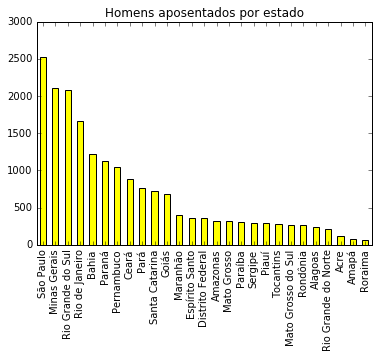

In [117]:
homens_aposentados= estados.value_counts()
mulheres_aposentadas= estados.value_counts()
homens_aposentados.plot(kind='bar',color=('yellow'),legend = False,title="Homens aposentados por estado")

Agora para as mulhers basta fazer o gráfico com dados do sexo feminino!

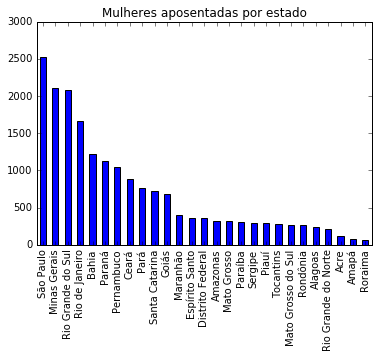

In [120]:
mulheres_aposentadas.plot(kind='bar',legend= False,title='Mulheres aposentadas por estado')

A taxa de analfabetismo é um fator a ser considerado também! Dessa forma, a divisão entre alfabetizados e não alfabetizados é
nescessária!

In [89]:
ler_escrever = dados[(dados.V9122 == 2)&(dados.V0302 == 2)].V0601.astype('category')

In [90]:
ler_escrever.cat.categories=('Sim','Não')

In [91]:
ler_escrever.value_counts(True)*100

Sim    79.148041
Não    20.851959
dtype: float64

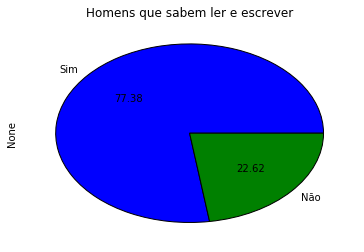

In [121]:
grafico=ler_escrever.value_counts(True)*100
grafico.plot(kind='pie',autopct="%0.2f",legend=False,title='Homens que sabem ler e escrever')

Para as mulheres, basta utilizar os dados femininos!

In [94]:
ler_escrever = dados[(dados.V9122 == 2)&(dados.V0302 ==4)].V0601.astype('category')

In [95]:
ler_escrever.cat.categories=("Sim","Não")

In [96]:
ler_escrever.value_counts(True)*100

Sim    77.384349
Não    22.615651
dtype: float64

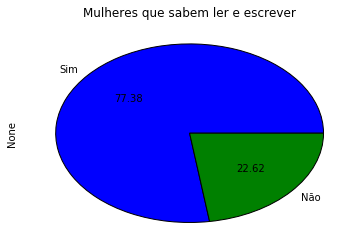

In [122]:
grafico1=ler_escrever.value_counts(True)*100
grafico1.plot(kind='pie',autopct="%0.2f",legend=False,title='Mulheres que sabem ler e escrever')

In [98]:
#aposentados analfabetos raça(mulheres)

In [99]:
ler_escrever_raca = dados[(dados.V9122 == 2)&(dados.V0302 == 4)&(dados.V0601 == 3)].V0404.astype('category')

In [100]:
ler_escrever_raca.cat.categories = ('Indígena','Branca', 'Preta', 'Amarela', 'Parda')
grafico2 = ler_escrever_raca.value_counts()

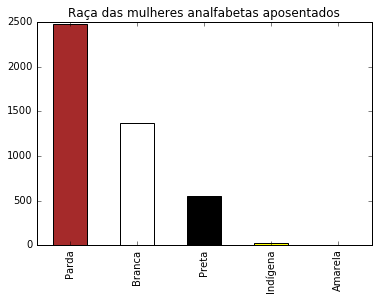

In [132]:
grafico2.plot(kind='bar',color=('brown', 'white', 'black', 'yellow','brown'), legend=False,title='Raça das mulheres analfabetas aposentados')

Para as mulhers, novamente, basta utilizar os dados femininos!

In [103]:
ler_escrever_raca2 = dados[(dados.V9122 == 2)&(dados.V0302 == 2)&(dados.V0601 == 3)].V0404.astype('category')

In [104]:
ler_escrever_raca2.cat.categories = ('Indígena','Branca', 'Preta', 'Amarela', 'Parda')
grafico3 = ler_escrever_raca2.value_counts()

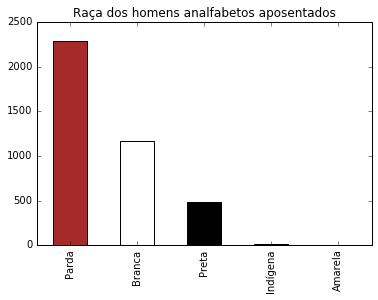

In [133]:
grafico3.plot(kind='bar',color=('brown', 'white', 'black', 'yellow','brown'), legend=False,title='Raça dos homens analfabetos aposentados')

Os dois gráficos acima concluem que os analfabetos aposentados predominam em raça parda, um resultado no mínimo
curioso em um primeiro momento já que a taxa de analfabetismo é maior nas raças preta e indígena!

Para a conclusão anterior ser desconstruída, uma divisão das raças dos aposentados é nescessária!

In [110]:
aposentados_raca= dados[(dados.V9122 ==2) & (dados.V0302 == 2)].V0404.astype('category')

In [112]:
aposentados_raca.cat.categories = ('Indígena','Branca', 'Preta', 'Amarela', 'Parda')
grafico4 = aposentados_raca.value_counts()

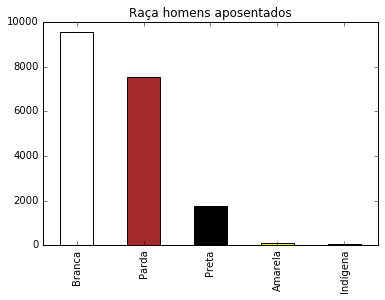

In [129]:
grafico4.plot(kind='bar',color=('white', 'brown', 'black', 'yellow','brown'), legend=False,title='Raça homens aposentados')

Para as mulhers, novamente, basta utilizar os dados femininos!

In [125]:
aposentados_raca2= dados[(dados.V9122 ==2) & (dados.V0302 == 4)].V0404.astype('category')

In [126]:
aposentados_raca2.cat.categories = ('Indígena','Branca', 'Preta', 'Amarela', 'Parda')
grafico5 = aposentados_raca2.value_counts()

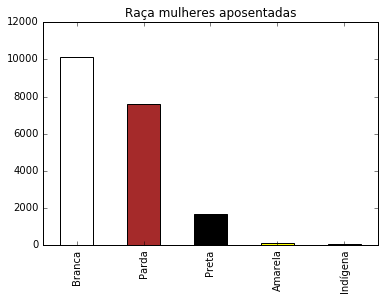

In [128]:
grafico5.plot(kind='bar',color=('white', 'brown', 'black', 'yellow','brown'), legend=False,title='Raça mulheres aposentadas')

## Conclusão


## 1- Conclui-se que uma seleção eficiente de variáveis facilita muito o trabalho a ser feito. O maior tempo gasto nesse trabalho foi gasto na seleção de variáveis e sua combinação para resultados conclusivos.

## 2- Primeiramente, ao analisar os aposentados, uma divisão entre homens e mulheres foi feita para a obtenção de resultados mais específicos. Em seguida, uma análise dos aposentados foi feita sob o quesito analfabetismo. Conclui-se que existem mais mulheres analfabetas que homens.

## 3-Uma análise mais profunda também provou que ambos homens e mulheres analfabetos e aposentados predominam em raça parda, um resultado no mínimo curioso em um primeiro momento já que a taxa de analfabetismo é maior nas raças preta e indígena.

## 4-Ao pensar por outro lado, o resultado faz bastante sentido ao avaliar a porcentagem de aposentados por raça. Com esse dado, percebe-se que as raças preta e indígena não contribuem em peso com o INSS, ou seja, não conseguem se aposentar.

## 5-Dessa forma, a conclusão de que os pardos analfabetos e aposentados são maioria passa a fazer sentido.